In [1]:
#Predict whether a building is high performance or not using machine learning algorithms such as desicion tree and svm
from IntelligentBuildingPerformanceDesign.AIBPD.data.preprocessing import PreprocessingCBECS
from IntelligentBuildingPerformanceDesign.AIBPD.data.database import Database
import numpy as np
from sklearn import tree
import pandas as pd
database=Database()
CBECS_DF=database.select('CBECS2012')

Load CBECS2012 successfully


In [2]:
CBECS_DF=CBECS_DF[CBECS_DF['climateZone']==1]
Preproc=PreprocessingCBECS()
CBECS_DF=Preproc.forHEHSClf(CBECS_DF)

C:\Users\tzcha\Documents\IntelligentBuildingPerformanceDesign\AIBPD\data\preprocessing.py:187: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  dataDF=dataDF.convert_objects(convert_numeric=True)


dataDF in preprocessing shape (2406, 717)
top10 0.8964705882352941 top25 8.601538461538462 top75 47.029411764705884 top90 84.16501363636364


In [3]:
CBECS_DF['EUIHeatingC']=np.log2(CBECS_DF['EUIHeating'])

C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


In [4]:
print(np.log2(0.896),np.log2(8.602),np.log2(47.029411764705884),np.log2(84.16501363636364))

-0.1584293626044829 3.1046721312825625 5.5554913822299925 6.395148742161092


In [5]:
import matplotlib.pyplot as plt
fig_buildingAreaCategory=plt.figure(figsize=(10,6))
ax2=fig_buildingAreaCategory.add_subplot(1,1,1)
ax2.set_ylabel('Number of buildings')
ax2.set_xlabel(r'$EUI_h, [KBTU/ft^2]$')
ax2.hist(CBECS_DF['EUIHeating'].values,bins=100,range=(0,350))
fig_buildingAreaCategory.savefig("EUIheatingdistri.jpg",dpi=300,bbox_inches='tight')

C:\Users\tzcha\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\tzcha\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


C:\Users\tzcha\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\tzcha\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


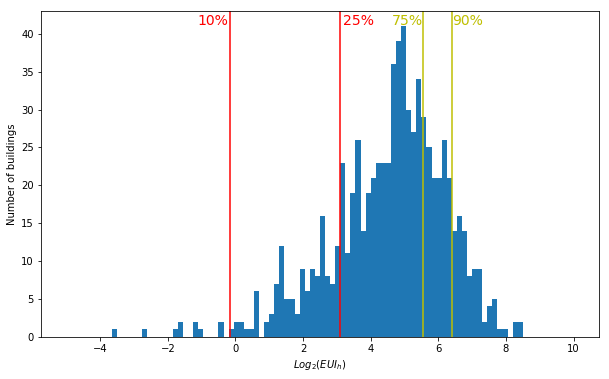

In [6]:
import matplotlib.lines as mlines
fig_buildingAreaCategory=plt.figure(figsize=(10,6))
ax2=fig_buildingAreaCategory.add_subplot(1,1,1)
ax2.set_ylabel('Number of buildings')
ax2.set_xlabel(r'$Log_2(EUI_h)$')#, [Log_2(KBTU/ft^2)]
ax2.hist(CBECS_DF['EUIHeatingC'].values,bins=100,range=(-5,10))
#line = mlines.Line2D([-0.1584293626044829,-2.5],[30,30], lw=0.2,color='r')
#ax2.add_line(line)
plt.text(-0.2,41.2, "10%",ha="right", family='sans-serif', size=14, color='r')
plt.text(3.18,41.2, "25%",ha="left", family='sans-serif', size=14, color='r')
plt.text(5.5554913822299925,41.2, "75%",ha="right", family='sans-serif', size=14, color='y')
plt.text(6.395148742161092,41.2, "90%",ha="left", family='sans-serif', size=14, color='y')
plt.axvline(x=-0.1584293626044829,color='red')
plt.axvline(x=3.1046721312825625,color='red')
plt.axvline(x=5.5554913822299925 ,color='y')
plt.axvline(x=6.395148742161092,color='y')
fig_buildingAreaCategory.savefig("EUIheatingdistriC.jpg",dpi=300,bbox_inches='tight')

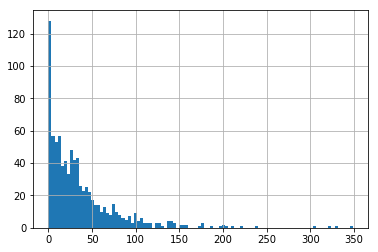

In [7]:
CBECS_DF['EUIHeating'].hist(bins=100)

In [8]:
CBECS_DF=CBECS_DF[CBECS_DF['EUIHeatingC']>=-10][CBECS_DF['EUIHeatingC']<=10]

C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


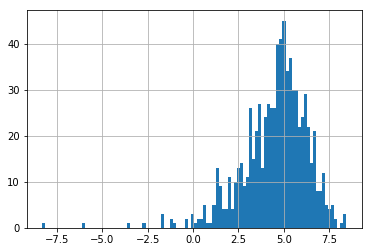

In [9]:
CBECS_DF['EUIHeatingC'].hist(bins=100)

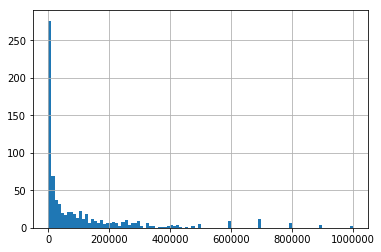

In [10]:
CBECS_DF['buildingArea'].hist(bins=100)

In [11]:
CBECS_DF['buildingAreaC']=np.log10(CBECS_DF['buildingArea'])

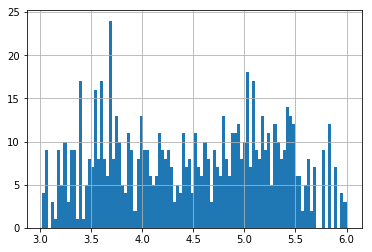

In [12]:
CBECS_DF['buildingAreaC'].hist(bins=100)

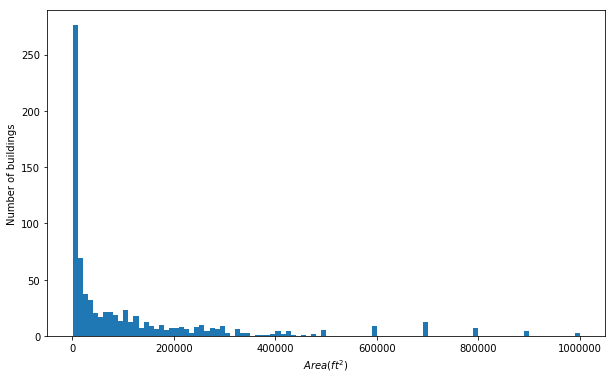

In [20]:
fig_buildingAreaCategory=plt.figure(figsize=(10,6))
ax2=fig_buildingAreaCategory.add_subplot(1,1,1)
ax2.set_ylabel('Number of buildings')
ax2.set_xlabel(r'$Area(ft^2$)')#, [Log_2(KBTU/ft^2)]$Log10(Area)$
ax2.hist(CBECS_DF['buildingArea'].values,bins=100)
#line = mlines.Line2D([-0.1584293626044829,-2.5],[30,30], lw=0.2,color='r')
#ax2.add_line(line)
#plt.text(-0.2,41.2, "10%",ha="right", family='sans-serif', size=14, color='r')
#plt.text(3.18,41.2, "25%",ha="left", family='sans-serif', size=14, color='r')
#plt.text(5.5554913822299925,41.2, "75%",ha="right", family='sans-serif', size=14, color='y')
#plt.text(6.395148742161092,41.2, "90%",ha="left", family='sans-serif', size=14, color='y')
#plt.axvline(x=-0.1584293626044829,color='red')
plt.axvline(x=3.86,color='red')
#plt.axvline(x=5.5554913822299925 ,color='y')
#plt.axvline(x=6.395148742161092,color='y')
fig_buildingAreaCategory.savefig("buildingArea.jpg",dpi=300,bbox_inches='tight')

In [23]:
import math
math.log10(71000)

4.8512583487190755